In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn import preprocessing

from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [124]:
example_ground_truth = pd.read_csv("../data/raw/example_ground_truth.csv")
example_ground_truth["id"] = example_ground_truth["image_id"]
example_ground_truth = example_ground_truth.drop(["seborrheic_keratosis", "image_id"], axis=1)
og_features = pd.read_csv("../fyp2022-imaging/features/features.csv")
og_features = pd.merge(og_features, example_ground_truth)
print(og_features)

features = pd.read_csv("../data/interim/features.csv")
features = features.drop(["seborrheic_keratosis"], axis=1)

norm_features = pd.read_csv("../data/interim/norm_features.csv")
norm_features = norm_features.drop(["seborrheic_keratosis"], axis=1)

print(og_features.head())
print(norm_features.head())

               id        area  perimeter  melanoma
0    ISIC_0001769    216160.0     2013.0       0.0
1    ISIC_0001852    130493.0     1372.0       0.0
2    ISIC_0001871    205116.0     1720.0       0.0
3    ISIC_0003462    161705.0     1344.0       0.0
4    ISIC_0003539    317040.0     2063.0       0.0
..            ...         ...        ...       ...
145  ISIC_0015443   9732988.0    13775.0       0.0
146  ISIC_0015445  12049938.0    19517.0       0.0
147  ISIC_0015483   8856478.0    13813.0       0.0
148  ISIC_0015496   8951522.0    13742.0       0.0
149  ISIC_0015627   3193093.0     8751.0       0.0

[150 rows x 4 columns]
             id      area  perimeter  melanoma
0  ISIC_0001769  216160.0     2013.0       0.0
1  ISIC_0001852  130493.0     1372.0       0.0
2  ISIC_0001871  205116.0     1720.0       0.0
3  ISIC_0003462  161705.0     1344.0       0.0
4  ISIC_0003539  317040.0     2063.0       0.0
       image_id  melanoma    Perimeter          Area  Norm_Compactness  \
0  ISIC_

<AxesSubplot:>

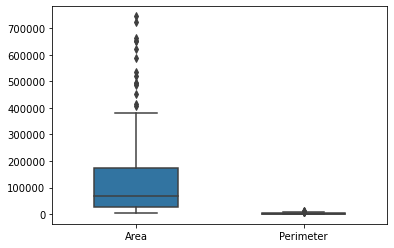

In [92]:
### using boxplots to see the distribution of different measures

sns.boxplot(data = features[["Area","Perimeter"]], width=0.5)

<AxesSubplot:>

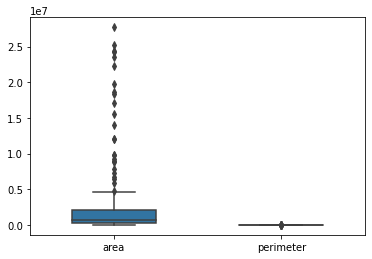

In [131]:
sns.boxplot(data = og_features[["area","perimeter"]], width=0.5)

<AxesSubplot:>

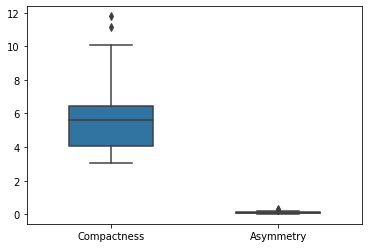

In [93]:
sns.boxplot(data = features[["Compactness", "Asymmetry"]], width=0.5)

<AxesSubplot:>

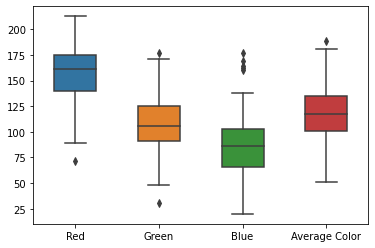

In [94]:
sns.boxplot(data = features[["Red","Green", "Blue", "Average Color"]], width=0.5)

-1.6209256159527285e-16
0.9999999999999998


<AxesSubplot:>

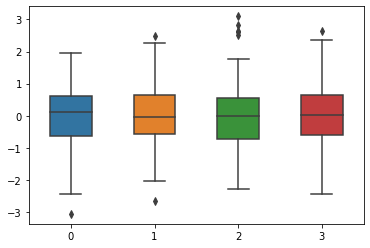

In [106]:
### i dont even wanna include this cuz i cant even begin to comprehend what the heck this is doing

#Let's scale the features
from sklearn import preprocessing

df1 = features[["Red","Green", "Blue", "Average Color"]]
#Fit scaler on our data
scaler = preprocessing.StandardScaler().fit(df1)

#Apply to data itself
df2 = scaler.transform(df1)

print(df2.mean()) #small number close to 0, round of error
print(df2.var())  #equal to 1 

sns.boxplot(data=df2, width=0.5,fliersize=5) #we see both negative and positive values, since the mean is 0

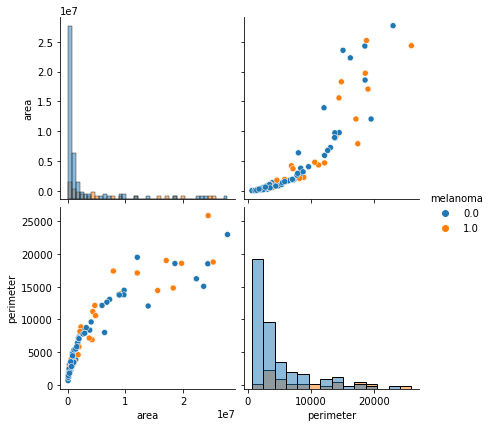

In [127]:
sns.pairplot(og_features[["area","perimeter","melanoma"]], hue="melanoma", height=3, diag_kind="hist")

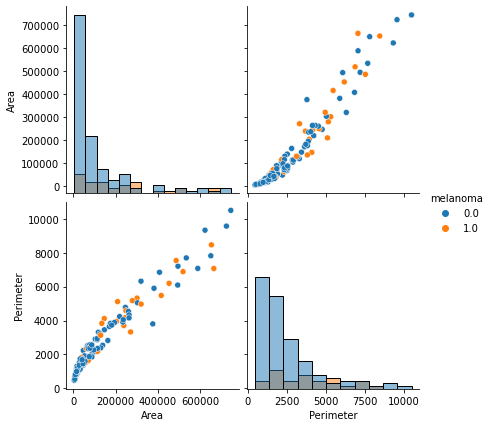

In [126]:
sns.pairplot(features[["Area","Perimeter","melanoma"]], hue="melanoma", height=3, diag_kind="hist")

In [129]:
#sns.pairplot(features[["Compactness","Asymmetry","melanoma"]], hue="melanoma", height=3, diag_kind="hist")

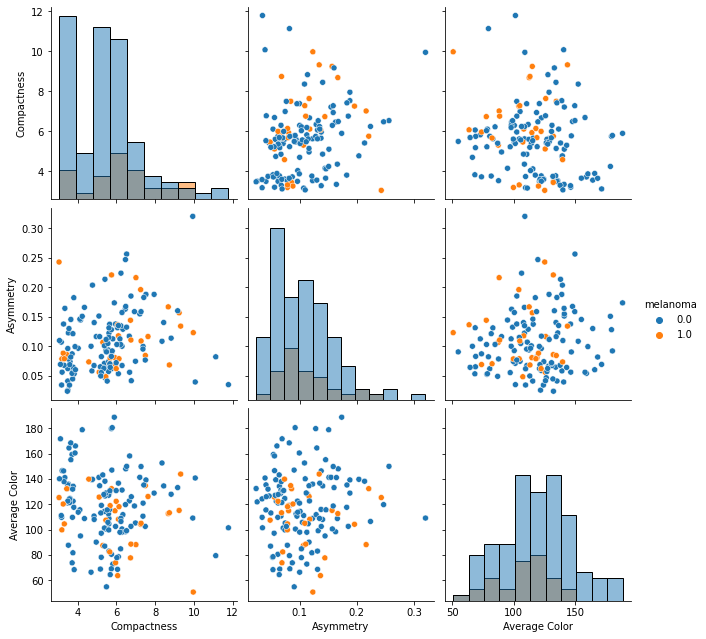

In [99]:
sns.pairplot(features[["Compactness", "Asymmetry", "Average Color", "melanoma"]], hue="melanoma", height=3, diag_kind="hist")

<AxesSubplot:xlabel='melanoma', ylabel='Area'>

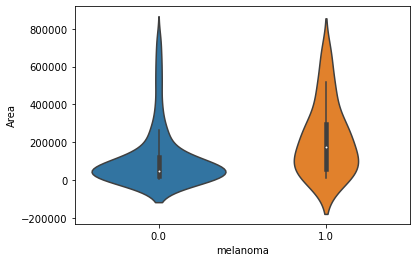

In [98]:
sns.violinplot(x="melanoma", y="Area", data=features, size=8)

<AxesSubplot:xlabel='melanoma', ylabel='Compactness'>

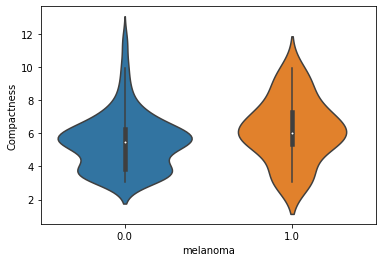

In [69]:
sns.violinplot(x="melanoma", y="Compactness", data=features, size=8)

<AxesSubplot:xlabel='melanoma', ylabel='Asymmetry'>

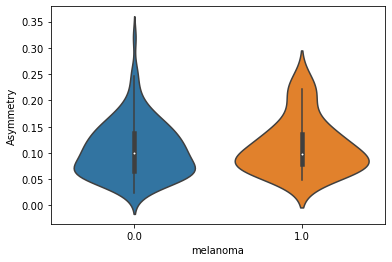

In [70]:
sns.violinplot(x="melanoma", y="Asymmetry", data=features, size=8)

<AxesSubplot:xlabel='melanoma', ylabel='Average Color'>

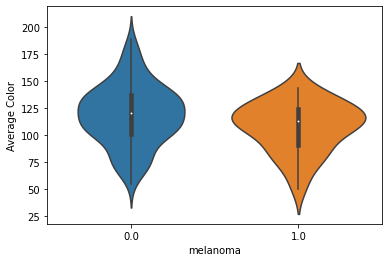

In [71]:
sns.violinplot(x="melanoma", y="Average Color", data=features, size=8)

<AxesSubplot:xlabel='melanoma', ylabel='Red'>

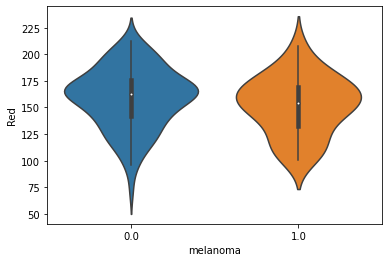

In [72]:
sns.violinplot(x="melanoma", y="Red", data=features, size=8)

<AxesSubplot:xlabel='melanoma', ylabel='Green'>

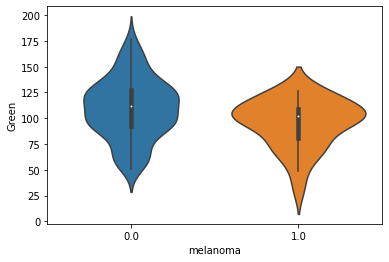

In [73]:
sns.violinplot(x="melanoma", y="Green", data=features, size=8)

<AxesSubplot:xlabel='melanoma', ylabel='Blue'>

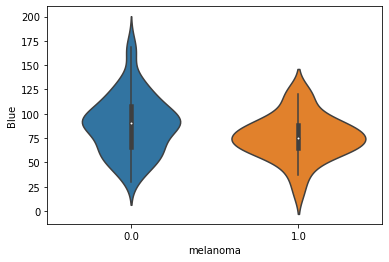

In [74]:
sns.violinplot(x="melanoma", y="Blue", data=features, size=8)

43
(150, 3)


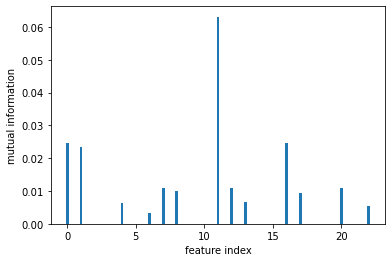

In [104]:
random_seed = 42
num_noisy_features = 20

noise = np.random.RandomState(random_seed).uniform(0, 0.1, size=(features.shape[0], num_noisy_features))

X = np.hstack((features[["Compactness", "Asymmetry", "Average Color"]], noise))
y = features["melanoma"]

num_total_features = X.shape[1] + num_noisy_features
print(num_total_features)

selector = SelectKBest(mutual_info_classif, k=3)
selector.fit(X, y)

scores = selector.scores_

fig, ax = plt.subplots()
ax.bar(np.arange(0,23), scores, width=.2)
ax.set_xlabel('feature index')
ax.set_ylabel('mutual information')

X_after_selection = selector.transform(X)

print(X_after_selection.shape)